# Classification

## Exercises: Applied

### Question 10)
 This question should be answered using the Weekly data set, which
is part of the ISLR package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

### 10 (a).
Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# source: https://github.com/dsnair/ISLR/blob/master/data/csv/Weekly.csv
df_weekly = pd.read_csv('datasets/Weekly.csv')
df_weekly.head(2)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down


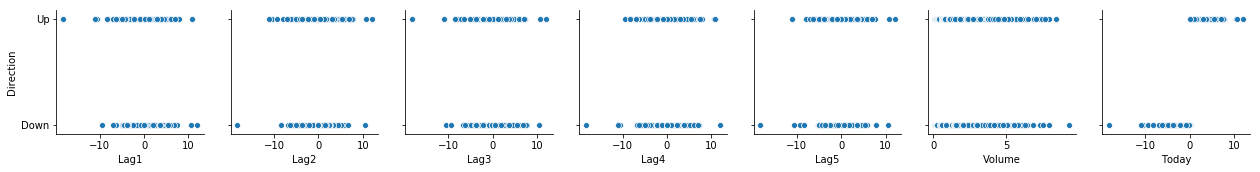

In [2]:
sns.pairplot(x_vars=df_weekly.columns[1:-1], y_vars='Direction', data=df_weekly)

### 10 (b).
Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [3]:
df_weekly['label'] = df_weekly.Direction.apply(lambda x: 1 if x == 'Up' else 0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_weekly[df_weekly.columns[1:-2]]
clf = LogisticRegression(random_state=0).fit(X, df_weekly.label)
y_pred = clf.predict(X)

# 99 % accuracy
accuracy_score(df_weekly.label, y_pred)

0.9972451790633609

In [4]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(df_weekly.label, X)
results = logit.fit()
results.summary()

         Current function value: 0.000000
         Iterations: 35


/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 06 Jul 2020   Pseudo R-squ.:                   1.000
Time:                        15:38:49   Log-Likelihood:            -0.00034619
converged:                      False   LL-Null:                       -748.10
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -4.4433    118.247     -0.038      0.970    -236.203     227.317
Lag2           6.9410    114.313      0.061      0.952    -217.109     230.991
Lag3          -3.1407    132.924     -0.024      0.981    -263.667     257.386
Lag4          -3.9807    103.920     -0.038      0.969    -207.661     199.699
Lag5           8.1373    147.793      0.055      0.956    -281.531     297.806
Volume        -0.6675     61.145     -0.011      0.991    -120.510     119.175
Today        686.2131   6462.639      0.106      0.915    -1.2e+04    1.34e+04
==============================================================================

Possibly complete quasi-separation: A fraction 1.00 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* None of the variablesd are statistically significant.

### 10 (c).
Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

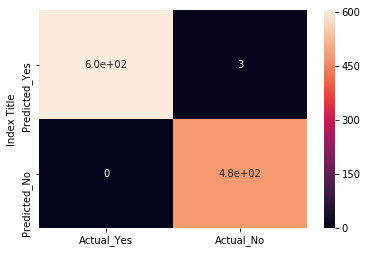

In [5]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(df_weekly.label, y_pred).ravel()

# Confusion Matrix
con_matrix = pd.DataFrame({'Index Title':['Predicted_Yes','Predicted_No']})
con_matrix.index = con_matrix['Index Title']
del con_matrix['Index Title']
con_matrix['Actual_Yes'] = [tp, fn]
con_matrix['Actual_No'] = [fp, tn]
sns.heatmap(con_matrix, annot=True)

* Only 3 misclassified, all of them False Positives/ Type-I errors.

### 10 (d).
Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [6]:
df_weekly_2008 = df_weekly[df_weekly.Year <= 2008]
X = df_weekly_2008[df_weekly_2008.columns[1:-2]]

clf = LogisticRegression(random_state=0).fit(X, df_weekly_2008.label)
y_pred = clf.predict(X)
accuracy_score(df_weekly_2008.label, y_pred)

0.9969543147208122

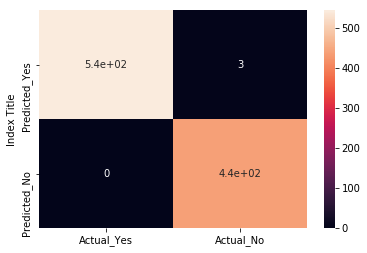

In [7]:
tn, fp, fn, tp = confusion_matrix(df_weekly_2008.label, y_pred).ravel()

# Confusion Matrix
con_matrix = pd.DataFrame({'Index Title':['Predicted_Yes','Predicted_No']})
con_matrix.index = con_matrix['Index Title']
del con_matrix['Index Title']
con_matrix['Actual_Yes'] = [tp, fn]
con_matrix['Actual_No'] = [fp, tn]
sns.heatmap(con_matrix, annot=True)

* Only 3 misclassified, all of them False Positives/ Type-I errors.

### 10 (e).
Repeat (d) using LDA.

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X, df_weekly_2008.label)

LinearDiscriminantAnalysis()

In [9]:
# 96 % accuracy
accuracy_score(lda.predict(X), df_weekly_2008.label)

0.9634517766497462

### 10 (f).
Repeat (d) using QDA.

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, df_weekly_2008.label)

QuadraticDiscriminantAnalysis()

In [11]:
# 94 % accuracy
accuracy_score(qda.predict(X), df_weekly_2008.label)

0.9401015228426396

### 10 (g).
Repeat (d) using KNN with K = 1.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, df_weekly_2008.label)

KNeighborsClassifier(n_neighbors=1)

In [13]:
# 100 % accuracy
accuracy_score(neigh.predict(X), df_weekly_2008.label)

1.0

### 10 (h).
(h) Which of these methods appears to provide the best results on
this data?

* KNN (K=1) model attains highest accuracy.

### 10 (i).
Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
X = pd.concat([X, pd.DataFrame(PolynomialFeatures().fit_transform(X))], axis=1)
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, df_weekly_2008.label)
# 100 % accuracy
accuracy_score(neigh.predict(X), df_weekly_2008.label)

1.0

## Problem 11).
In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

### 11 (a).
 Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.

In [15]:
df_auto = pd.read_csv('datasets/Auto.data', delim_whitespace=True)
df_auto.replace('?',0, inplace=True)
df_auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


In [16]:
df_auto['mpg01'] = df_auto.mpg.apply(lambda x: 1 if x>=df_auto.mpg.median() else 0)

### 11 (b).
Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

In [17]:
df_auto.drop(columns='mpg', inplace=True)

In [18]:
df_auto.head(2)

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0


In [19]:
df_auto.groupby(['mpg01']).mean()

,cylinders,displacement,weight,acceleration,year,origin
mpg01,,,,,,
0,6.761421,272.786802,3616.619289,14.59797,74.395939,1.162437
1,4.175000,115.467500,2333.600000,16.49900,77.570000,1.980000


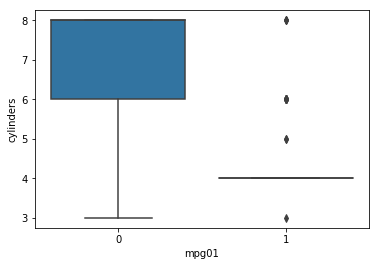

In [20]:
sns.boxplot(x='mpg01', y='cylinders', data=df_auto)

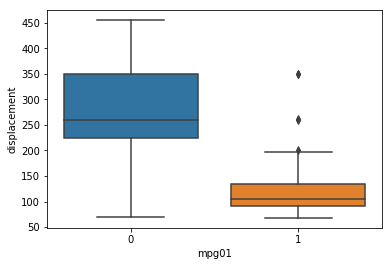

In [21]:
sns.boxplot(x='mpg01', y='displacement', data=df_auto)

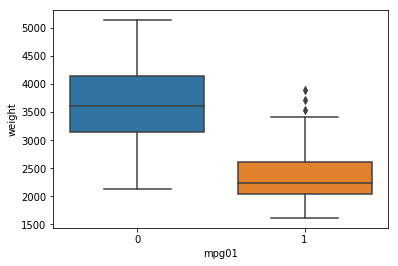

In [22]:
sns.boxplot(x='mpg01', y='weight', data=df_auto)

### 11 (c).
Split the data into a training set and a test set.

In [23]:
from sklearn.model_selection import train_test_split
X, y = df_auto[df_auto.columns[:-2]], df_auto.mpg01

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 11 (d).
Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# 11 % misclassification
1-accuracy_score(y_test, y_pred)

0.11363636363636365

### 11 (e).
Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

# 10.6 % misclassification
1-accuracy_score(y_test, y_pred)

0.10606060606060608

### 11 (f).
Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 12 % misclassification
1-accuracy_score(y_test, y_pred)

0.12121212121212122

### 11 (g).
Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)

# 12 % misclassification
1-accuracy_score(y_test, y_pred)

0.16666666666666663

In [28]:
ks = [i for i in range(1, 11)]

error_rates = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1-accuracy_score(y_test, y_pred))

In [29]:
error_rates

[0.14393939393939392,
 0.1742424242424242,
 0.1742424242424242,
 0.16666666666666663,
 0.16666666666666663,
 0.15909090909090906,
 0.15909090909090906,
 0.1742424242424242,
 0.1742424242424242,
 0.18181818181818177]

* K=1 provides least misclassification rate.

## Problem 13).

Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

In [30]:
from sklearn.datasets import load_boston
bos = load_boston()
X, y = load_boston(return_X_y=True)
df_bos = pd.DataFrame(X, columns=bos.feature_names)
df_bos['y'] = y

In [31]:
df_bos['label'] = df_bos.y.apply(lambda x: 1 if x >= df_bos.y.median() else 0)

In [32]:
df_bos.label.value_counts()

1    255
0    251
Name: label, dtype: int64

In [33]:
X = df_bos[df_bos.columns[:-2]]
y = df_bos.label

In [34]:
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)

# 12 % misclassification
1-accuracy_score(y, y_pred)

0.12055335968379444

In [35]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
y_pred = lda.predict(X)

# 14 % misclassification
1-accuracy_score(y, y_pred)

0.14229249011857703